# Avocado Price Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [2]:
%matplotlib inline

# Import Dataset

In [3]:
dataset = pd.read_csv('avocado.csv')

In [4]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

## Exploratory Data Analysis

In [10]:
for column in dataset.columns:
    if dataset[column].nunique() < 25:
        unique = dataset[column].unique()
        print(f'{column}: {unique}')

type: ['conventional' 'organic']
year: [2015 2016 2017 2018]


In [14]:
# categorical
categorical_columns = list()

for column in dataset.columns:
    if dataset[column].dtype == 'O':
        categorical_columns.append(column)
        print(column)

Date
type
region


In [15]:
# numerical
numerical_columns = list()

for column in dataset.columns:
    if dataset[column].dtype != 'O':
        numerical_columns.append(column)
        print(column)

AveragePrice
Total Volume
4046
4225
4770
Total Bags
Small Bags
Large Bags
XLarge Bags
year


In [16]:
if len(categorical_columns) + len(numerical_columns) == len(dataset.columns):
    print('Validated')

Validated


### missing value

<AxesSubplot:>

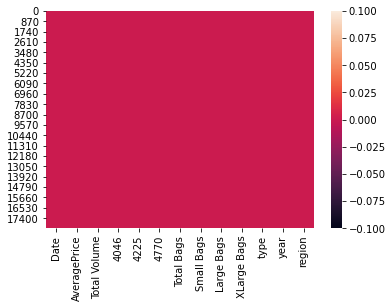

In [19]:
sns.heatmap(dataset.isnull(), cbar=True)

## Data Visualizatin

<AxesSubplot:xlabel='count', ylabel='year'>

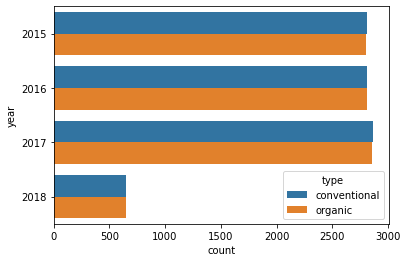

In [24]:
sns.countplot(y='year', data=dataset, hue='type')

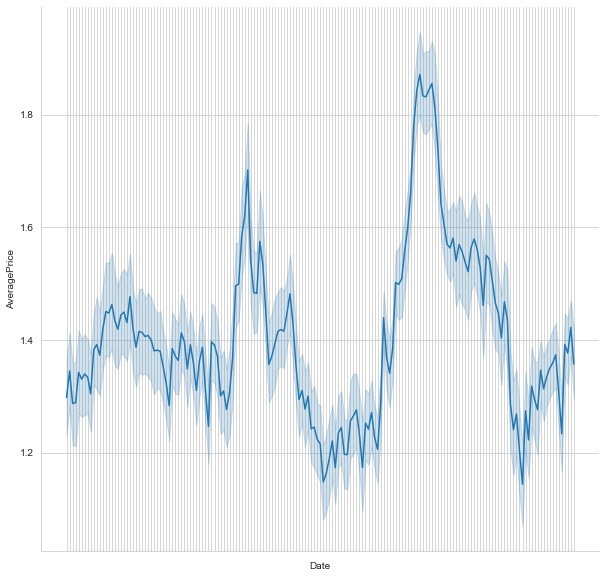

In [38]:
fig = plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.lineplot(x='Date', y='AveragePrice', data=dataset)
sns.despine()
ax.set(xticklabels=[])
plt.show()

<AxesSubplot:>

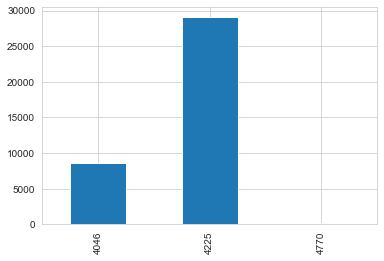

In [54]:
dataset[['4046', '4225', '4770']].median().plot.bar()

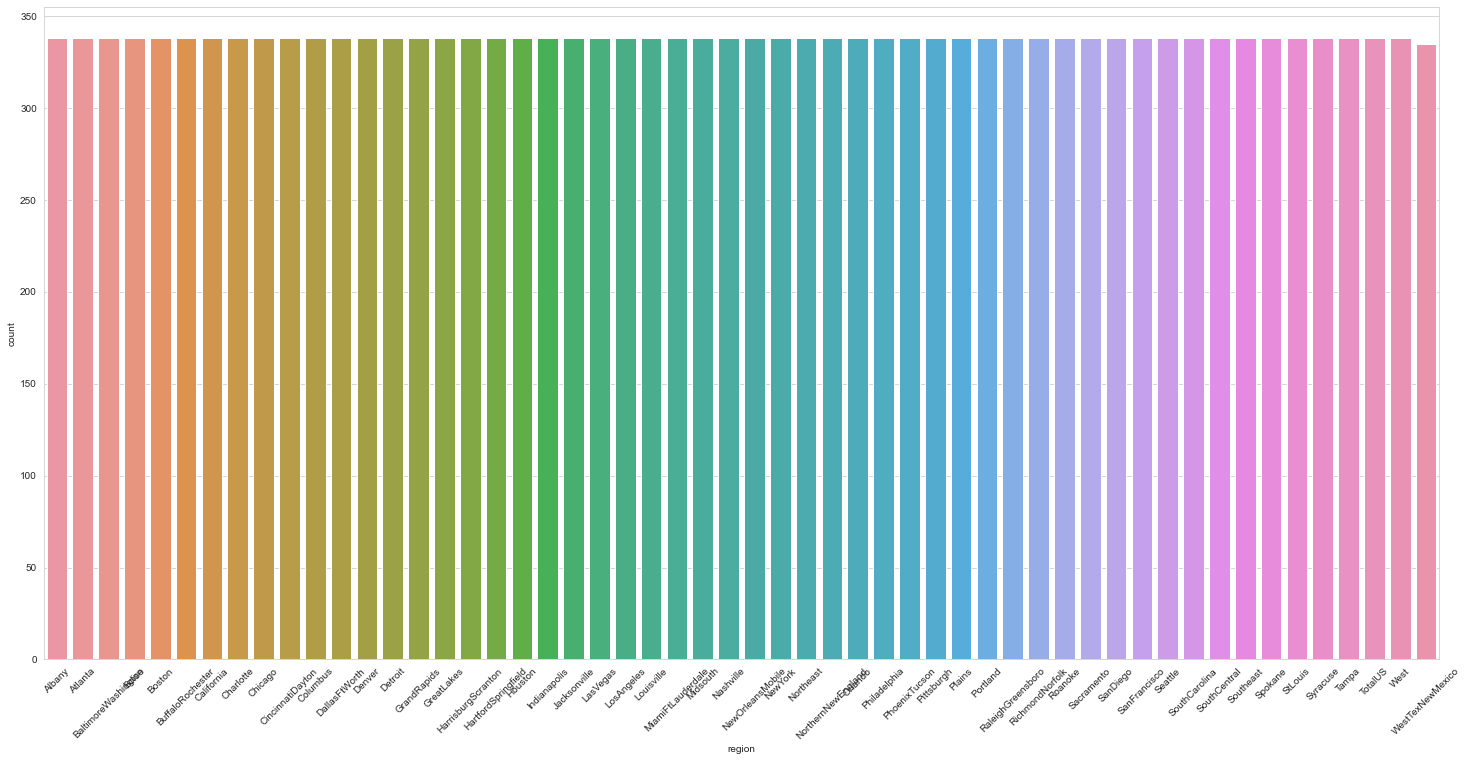

In [57]:
fig = plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = dataset)
plt.xticks(rotation = 45)
plt.show()

## Data Preperation

In [58]:
df = dataset[['Date', 'AveragePrice']]

In [60]:
df = df.rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

## Model 

In [61]:
prophet = Prophet()

In [62]:
prophet.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future) 

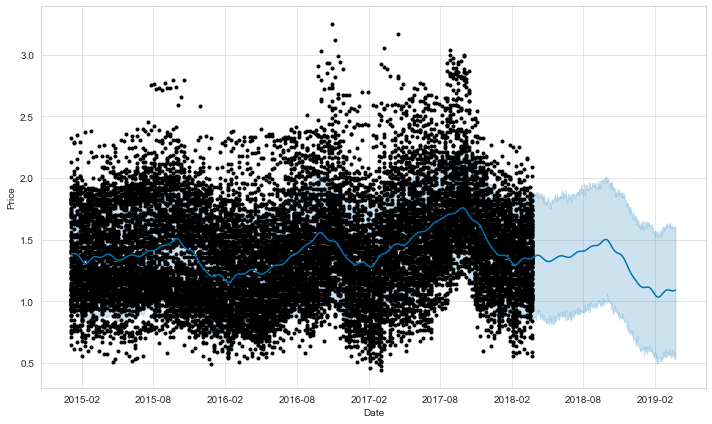

In [67]:
figure1 = prophet.plot(forecast, xlabel='Date', ylabel='Price')

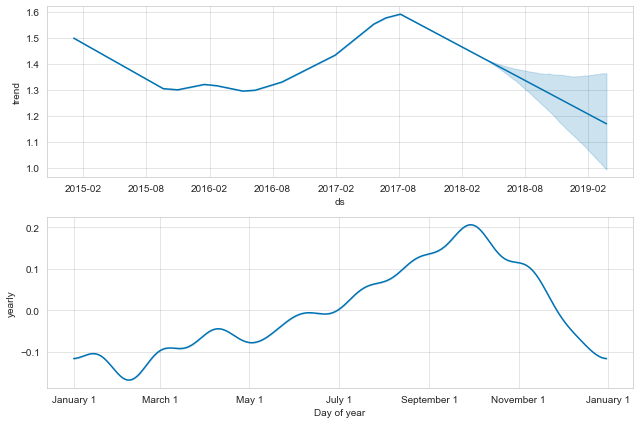

In [68]:
figure2 = prophet.plot_components(forecast)